# Pràctica 3: Acoloriments, Quadrats Llatins i Sudokus

Aquest full de càlcul de *SageMath* no conté les explicacions detallades de la pràctica. Només conté les comandes que s'utilitzen i algun comentari. Els detalls els trobareu al guió de la pràctica P3.

Depenent de la versió del *SageMath* el resultats de les comandes poden variar. Això passa quan hi ha més d'un resultat i la comanda genera el primer que troba. Si la versió és diferent, l'algoritme de tria pot haver canviat.

Aquests resultats s'han generat amb la versió 8.9 i la 9.0

## Recordem alguns detalls d'acoloriments de grafs

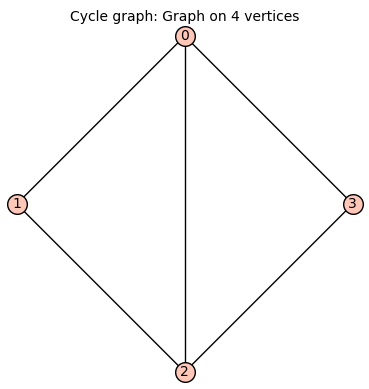

In [1]:
G=graphs.CycleGraph(4)
G.add_edge(0,2)
G

In [6]:
from sage.graphs.graph_coloring import all_graph_colorings

In [7]:
CG=all_graph_colorings(G,3,hex_colors=True)

In [8]:
CG

In [9]:
ll_Gcl=[]
for cl in CG:
    ll_Gcl.append(G.plot(vertex_colors=cl))

In [10]:
ll_Gcl

[Graphics object consisting of 10 graphics primitives,
 Graphics object consisting of 10 graphics primitives,
 Graphics object consisting of 10 graphics primitives,
 Graphics object consisting of 10 graphics primitives,
 Graphics object consisting of 10 graphics primitives,
 Graphics object consisting of 10 graphics primitives]

In [11]:
len(ll_Gcl)

6

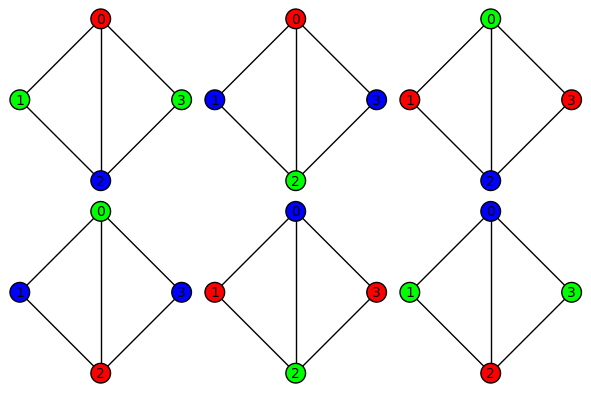

In [8]:
graphics_array([[ll_Gcl[k] for k in [0..2]],
                [ll_Gcl[k] for k in [3..5]]])

## Generació d'un QL acolorint un determinat graf

Explicacions a la Secció 4 del guió.

In [1]:
from sage.graphs.graph_coloring import vertex_coloring

In [2]:
def QL(nn):
    # generem el grid graf
    G=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            G.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            G.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # generem l'acoloriment de G
    # (retorna una k-particio del vertexs)
    vc=vertex_coloring(G,value_only=False)
    vcc=vertex_coloring(G,hex_colors=True)
    # ql es la llista que contindra el QL
    # es una llista de llistes (les files)
    ql=[]
    # els seguents llacos fan els 
    # passos 3b i 3c
    for i in range(nn):
        laux=[]
        for j in range(nn):
            for k in range(nn):
                if ((i,j) in vc[k]):
                    laux.append(k)
                    break
        ql.append(laux)
    return G.plot(vertex_colors=vcc,vertex_labels=False),ql

In [4]:
%time dibG,ll=QL(10)

CPU times: user 3.72 s, sys: 282 ms, total: 4 s
Wall time: 3.99 s


In [5]:
ll

[[0, 1, 2, 3, 9, 7, 8, 5, 4, 6],
 [9, 4, 8, 0, 2, 6, 3, 1, 5, 7],
 [8, 5, 3, 7, 6, 2, 1, 4, 0, 9],
 [6, 9, 4, 5, 7, 1, 0, 8, 3, 2],
 [5, 8, 6, 4, 1, 3, 9, 2, 7, 0],
 [1, 7, 0, 8, 5, 4, 6, 9, 2, 3],
 [7, 6, 1, 2, 0, 8, 5, 3, 9, 4],
 [2, 3, 9, 1, 4, 0, 7, 6, 8, 5],
 [3, 2, 7, 9, 8, 5, 4, 0, 6, 1],
 [4, 0, 5, 6, 3, 9, 2, 7, 1, 8]]

In [6]:
table(ll)

\(0\),\(1\),\(2\),\(3\),\(9\),\(7\),\(8\),\(5\),\(4\),\(6\)
\(9\),\(4\),\(8\),\(0\),\(2\),\(6\),\(3\),\(1\),\(5\),\(7\)
\(8\),\(5\),\(3\),\(7\),\(6\),\(2\),\(1\),\(4\),\(0\),\(9\)
\(6\),\(9\),\(4\),\(5\),\(7\),\(1\),\(0\),\(8\),\(3\),\(2\)
\(5\),\(8\),\(6\),\(4\),\(1\),\(3\),\(9\),\(2\),\(7\),\(0\)
\(1\),\(7\),\(0\),\(8\),\(5\),\(4\),\(6\),\(9\),\(2\),\(3\)
\(7\),\(6\),\(1\),\(2\),\(0\),\(8\),\(5\),\(3\),\(9\),\(4\)
\(2\),\(3\),\(9\),\(1\),\(4\),\(0\),\(7\),\(6\),\(8\),\(5\)
\(3\),\(2\),\(7\),\(9\),\(8\),\(5\),\(4\),\(0\),\(6\),\(1\)
\(4\),\(0\),\(5\),\(6\),\(3\),\(9\),\(2\),\(7\),\(1\),\(8\)


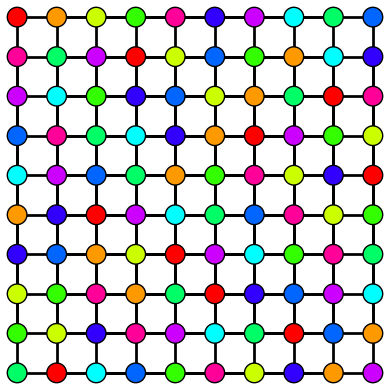

In [7]:
dibG

## Generació d'un sudoku acolorint un determinat graf

Detalls a la Secció 5 del guió de la pràctica P3.

In [8]:
from sage.graphs.graph_coloring import vertex_coloring

In [5]:
def SK():
    nn=9
    # generem el grid graf
    G=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            G.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            G.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # afegim les condicions addicionals
    for i in [0,3,6]:
        for j in [0,3,6]:
            G.add_edges([((i,j),(i+1,j+1)),((i,j),(i+1,j+2)),((i,j),(i+2,j+1)),((i,j),(i+2,j+2))])
            G.add_edges([((i,j+1),(i+1,j)),((i,j+1),(i+1,j+2)),((i,j+1),(i+2,j)),((i,j+1),(i+2,j+2))])
            G.add_edges([((i,j+2),(i+1,j)),((i,j+2),(i+1,j+1)),((i,j+2),(i+2,j)),((i,j+2),(i+2,j+1))])
            G.add_edges([((i+1,j),(i+2,j+1)),((i+1,j),(i+2,j+2))])
            G.add_edges([((i+1,j+1),(i+2,j)),((i+1,j+1),(i+2,j+2))])
            G.add_edges([((i+1,j+2),(i+2,j)),((i+1,j+2),(i+2,j+1))])
    # generem l'acoloriment de G
    # (retorna una k-particio del vertexs)
    vc=vertex_coloring(G,value_only=False)
    # ql es la llista que contindra el SK
    # es una llista de llistes (les files)
    sk=[]
    # els seguents llacos fan els 
    # passos 3b i 3c que tambe funcionen
    # pel SKs
    for i in range(nn):
        laux=[]
        for j in range(nn):
            for k in range(nn):
                if ((i,j) in vc[k]):
                    laux.append(k+1)
                    break
        sk.append(laux)
    return sk

In [8]:
%time ll1=SK()
ll1

CPU times: user 781 ms, sys: 54.8 ms, total: 836 ms
Wall time: 833 ms


[[1, 4, 9, 2, 7, 6, 8, 3, 5],
 [8, 3, 6, 9, 1, 5, 2, 4, 7],
 [2, 5, 7, 3, 4, 8, 1, 6, 9],
 [9, 8, 2, 7, 6, 4, 3, 5, 1],
 [3, 6, 5, 1, 8, 9, 4, 7, 2],
 [7, 1, 4, 5, 2, 3, 6, 9, 8],
 [5, 2, 1, 4, 3, 7, 9, 8, 6],
 [4, 9, 8, 6, 5, 1, 7, 2, 3],
 [6, 7, 3, 8, 9, 2, 5, 1, 4]]

In [9]:
%time ll2=SK()
ll2

CPU times: user 782 ms, sys: 44.5 ms, total: 826 ms
Wall time: 823 ms


[[1, 4, 9, 2, 7, 6, 8, 3, 5],
 [8, 3, 6, 9, 1, 5, 2, 4, 7],
 [2, 5, 7, 3, 4, 8, 1, 6, 9],
 [9, 8, 2, 7, 6, 4, 3, 5, 1],
 [3, 6, 5, 1, 8, 9, 4, 7, 2],
 [7, 1, 4, 5, 2, 3, 6, 9, 8],
 [5, 2, 1, 4, 3, 7, 9, 8, 6],
 [4, 9, 8, 6, 5, 1, 7, 2, 3],
 [6, 7, 3, 8, 9, 2, 5, 1, 4]]

In [10]:
ll1==ll2

True

## Generació de més d'un QL

Detalls a la Secció 6.1 del guió de la practica P3.

In [11]:
from sage.graphs.graph_coloring import all_graph_colorings

In [12]:
def QL2(nn,r,m):
    # generem el grid graf
    G=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            G.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            G.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # generem l'acoloriment de G
    # (retorna una k-particio del vertexs)
    ##vc=vertex_coloring(G,value_only=False)
    CG=all_graph_colorings(G,nn,hex_colors=False)
    # ql es la llista que contindra el QL
    # es una llista de llistes (les files)
    tots_ql=[]
    # deixem passar r QL
    for k in range(r): next(CG)
    # els seguents llacos fan els 
    # passos 3b i 3c
    for kk in range(m):
        ql=[]
        try:
            vc=next(CG)
        except StopIteration:
            break
        for i in range(nn):
            laux=[]
            for j in range(nn):
                for k in range(nn):
                    if ((i,j) in vc[k]):
                        laux.append(k)
                        break
            ql.append(laux)
        if ql not in tots_ql:
            tots_ql.append(ql)
    return tots_ql

In [13]:
%time LQL=QL2(5,7,4)

CPU times: user 7.13 ms, sys: 256 µs, total: 7.38 ms
Wall time: 7.34 ms


In [14]:
len(LQL)

4

In [15]:
table(rows=LQL[0])

\(0\),\(1\),\(2\),\(3\),\(4\)
\(2\),\(3\),\(4\),\(0\),\(1\)
\(3\),\(2\),\(1\),\(4\),\(0\)
\(4\),\(0\),\(3\),\(1\),\(2\)
\(1\),\(4\),\(0\),\(2\),\(3\)


In [16]:
table(rows=LQL[1])

\(0\),\(1\),\(2\),\(3\),\(4\)
\(2\),\(3\),\(4\),\(0\),\(1\)
\(3\),\(4\),\(0\),\(1\),\(2\)
\(4\),\(0\),\(1\),\(2\),\(3\)
\(1\),\(2\),\(3\),\(4\),\(0\)


In [17]:
table(rows=LQL[2])

\(0\),\(1\),\(2\),\(3\),\(4\)
\(2\),\(3\),\(4\),\(0\),\(1\)
\(3\),\(4\),\(1\),\(2\),\(0\)
\(4\),\(0\),\(3\),\(1\),\(2\)
\(1\),\(2\),\(0\),\(4\),\(3\)


In [18]:
table(rows=LQL[3])

\(0\),\(1\),\(2\),\(3\),\(4\)
\(2\),\(4\),\(1\),\(0\),\(3\)
\(3\),\(2\),\(0\),\(4\),\(1\)
\(4\),\(0\),\(3\),\(1\),\(2\)
\(1\),\(3\),\(4\),\(2\),\(0\)


## Generació de més d'un sudoku

Detalls a la Secció 6.2 del guió de la pràctica P3.

In [18]:
from sage.graphs.graph_coloring import all_graph_colorings

In [19]:
def SK2(r,m):
    nn=9
    # generem el grid graf
    G=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            G.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            G.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # afegim les condicions addicionals
    for i in [0,3,6]:
        for j in [0,3,6]:
            G.add_edges([((i,j),(i+1,j+1)),((i,j),(i+1,j+2)),((i,j),(i+2,j+1)),((i,j),(i+2,j+2))])
            G.add_edges([((i,j+1),(i+1,j)),((i,j+1),(i+1,j+2)),((i,j+1),(i+2,j)),((i,j+1),(i+2,j+2))])
            G.add_edges([((i,j+2),(i+1,j)),((i,j+2),(i+1,j+1)),((i,j+2),(i+2,j)),((i,j+2),(i+2,j+1))])
            G.add_edges([((i+1,j),(i+2,j+1)),((i+1,j),(i+2,j+2))])
            G.add_edges([((i+1,j+1),(i+2,j)),((i+1,j+1),(i+2,j+2))])
            G.add_edges([((i+1,j+2),(i+2,j)),((i+1,j+2),(i+2,j+1))])
    # generem l'acoloriment de G
    # (retorna una k-particio del vertexs)
    CG=all_graph_colorings(G,nn,hex_colors=False)
    # ql es la llista que contindra el SK
    # es una llista de llistes (les files)
    tots_sk=[]
    # en deixem passar r
    for k in range(r):
        try:
            vc=next(CG)
        except StopIteration:
            break
    # els seguents llacos fan els 
    # passos 3b i 3c que tambe funcionen
    # pel SKs
    for kk in range(m):
        sk=[]
        try:
            vc=next(CG)
        except StopIteration:
            break
        for i in range(nn):
            laux=[]
            for j in range(nn):
                for k in range(nn):
                    if ((i,j) in vc[k]):
                        laux.append(k+1)
                        break
            sk.append(laux)
        tots_sk.append(sk)
    return tots_sk

In [20]:
%time LSK=SK2(19,4)

CPU times: user 131 ms, sys: 2.18 ms, total: 133 ms
Wall time: 132 ms


In [21]:
LSK[0]

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7, 8, 9, 2, 1, 3, 4, 5, 6],
 [4, 5, 6, 8, 7, 9, 1, 3, 2],
 [6, 7, 4, 5, 8, 2, 3, 9, 1],
 [2, 3, 1, 6, 9, 7, 5, 4, 8],
 [8, 9, 5, 1, 3, 4, 2, 6, 7],
 [3, 4, 7, 9, 2, 8, 6, 1, 5],
 [9, 1, 2, 3, 6, 5, 8, 7, 4],
 [5, 6, 8, 7, 4, 1, 9, 2, 3]]

In [22]:
LSK[1]

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7, 8, 9, 2, 1, 3, 4, 5, 6],
 [4, 5, 6, 8, 7, 9, 1, 3, 2],
 [6, 7, 4, 5, 8, 2, 3, 9, 1],
 [2, 3, 1, 6, 9, 7, 8, 4, 5],
 [8, 9, 5, 1, 3, 4, 2, 6, 7],
 [3, 4, 7, 9, 2, 5, 6, 1, 8],
 [9, 1, 2, 3, 6, 8, 5, 7, 4],
 [5, 6, 8, 7, 4, 1, 9, 2, 3]]

In [16]:
LSK[2]

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7, 8, 9, 2, 1, 3, 5, 6, 4],
 [4, 5, 6, 8, 7, 9, 1, 3, 2],
 [6, 7, 4, 5, 8, 2, 3, 9, 1],
 [2, 3, 1, 6, 9, 4, 8, 5, 7],
 [8, 9, 5, 1, 3, 7, 2, 4, 6],
 [3, 4, 7, 9, 2, 5, 6, 1, 8],
 [9, 1, 2, 3, 6, 8, 4, 7, 5],
 [5, 6, 8, 7, 4, 1, 9, 2, 3]]

In [17]:
LSK[3]

[[1, 2, 3, 4, 5, 6, 7, 8, 9],
 [7, 8, 9, 2, 1, 3, 5, 6, 4],
 [4, 5, 6, 8, 7, 9, 1, 3, 2],
 [6, 7, 4, 5, 8, 2, 3, 9, 1],
 [2, 3, 1, 6, 9, 4, 8, 5, 7],
 [8, 9, 5, 1, 3, 7, 2, 4, 6],
 [3, 4, 7, 9, 2, 8, 6, 1, 5],
 [9, 1, 2, 3, 6, 5, 4, 7, 8],
 [5, 6, 8, 7, 4, 1, 9, 2, 3]]

## Col·lapsar vèrtexs d'un graf

Per resoldre quadrats llatins parcialment acabats necessitem el procediment de col·lapsar vèrtexs d'un graf.

Detalls a la Secció 7.1 del guió de la pràctica P3.

In [23]:
def collapse(G,ll_v):
    gamma=[]
    H=copy(G)
    for v in ll_v:
        gamma=union(gamma,H.neighbors(v))
    for v in ll_v:
        if gamma.count(v)!=0:
            gamma.remove(v)
    nv=max(H.vertices())+1
    H.add_vertex(name=nv)
    H.delete_vertices(ll_v)
    H.add_edges([(nv,v) for v in gamma])
    return (nv,H)

In [58]:
G=graphs.PetersenGraph()

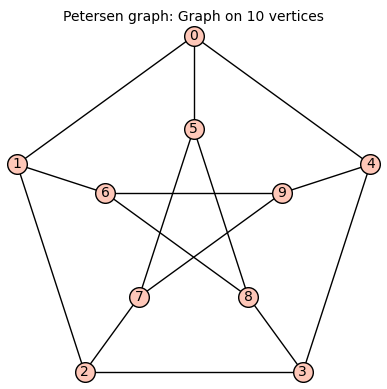

In [25]:
G

/tmp/ipykernel_3295/2683268007.py:5: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,H.neighbors(v))


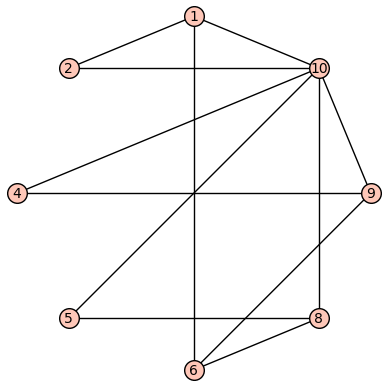

In [28]:
collapse(G,[0,3,7])[1].plot(layout='circular')

In [89]:
G=graphs.PetersenGraph()

In [91]:
def dibcoll(G,ll_v):
    posi=G.get_pos()
    for v in ll_v:
        posi.pop(v)
    llista=list(posi)
    nll=len(llista)
    gamma=[]
    #H=copy(G)
    for v in ll_v:
        gamma=union(gamma,G.neighbors(v))
    for v in ll_v:
        if gamma.count(v)!=0:
            gamma.remove(v)
    nv=max(G.vertices())+1
    nv_pos=(sum(posi.get(v)[0] for v in llista)/nll,sum(posi.get(v)[1] for v in llista)/nll)
    posi[nv]=nv_pos
    G.add_vertex(name=nv)
    G.delete_vertices(ll_v)
    G.add_edges([(nv,v) for v in gamma])
    #print(posi)
    dibuix=G.plot(pos=posi)
    return (dibuix)

/tmp/ipykernel_3295/813331480.py:10: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,G.neighbors(v))


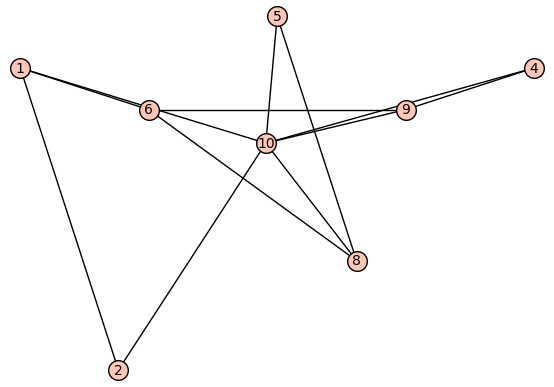

In [93]:
dibcoll(graphs.PetersenGraph(),[0,3,7])

/tmp/ipykernel_3295/813331480.py:10: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,G.neighbors(v))


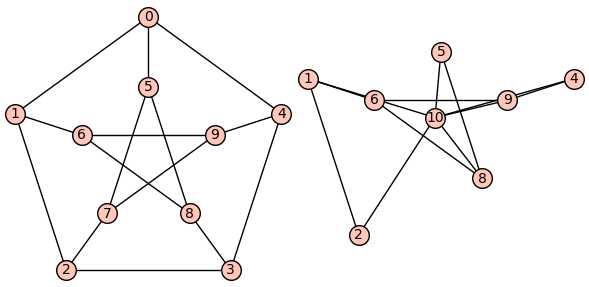

In [95]:
graphics_array([[graphs.PetersenGraph().plot(),dibcoll(graphs.PetersenGraph(),[0,3,7])]])

## Acabar quadrats llatins parcialment acabats

Detalls a la Secció 7.2 del guió.

In [99]:
def escriuQLPA(diccio):
    ordre=len(diccio)
    PA=[['*' for i in range(ordre)] for j in range(ordre)]
    for i in range(ordre):
        dades=diccio[i]
        for cuad in dades:
            PA[cuad[0]][cuad[1]]=str(i)
    return(table(rows=PA,frame=True))

In [3]:
acol_parcial={0:[(0,0),(1,4),(2,8),(3,2),(4,7),(5,3),(7,6)],
          1:[(0,1),(1,0),(2,4),(3,3),(6,2),(7,8)],
          2:[(0,2),(2,1),(4,3),(6,6),(7,7),(8,8)],
          3:[(0,3),(1,7),(5,1),(8,5)],
          4:[(0,4),(2,7)],
          5:[(0,5),(2,2),(3,0),(6,4),(8,3)],
          6:[(0,6),(1,1)],
          7:[(0,7),(4,4),(5,5)],
          8:[(0,8)]}

In [29]:
escriuQLPA(acol_parcial)

0,1,2,3,4,5,6,7,8
1,6,*,*,0,*,*,3,*
*,2,5,*,1,*,*,4,0
5,*,0,1,*,*,*,*,*
*,*,*,2,7,*,*,0,*
*,3,*,0,*,7,*,*,*
*,*,1,*,5,*,2,*,*
*,*,*,*,*,*,0,2,1
*,*,*,5,*,3,*,*,2


In [64]:
latex(escriuQLPA(acol_parcial))

\begin{tabular}{|l|l|l|l|l|l|l|l|l|} \hline
0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 \\ \hline
1 & 6 & * & * & 0 & * & * & 3 & * \\ \hline
* & 2 & 5 & * & 1 & * & * & 4 & 0 \\ \hline
5 & * & 0 & 1 & * & * & * & * & * \\ \hline
* & * & * & 2 & 7 & * & * & 0 & * \\ \hline
* & 3 & * & 0 & * & 7 & * & * & * \\ \hline
* & * & 1 & * & 5 & * & 2 & * & * \\ \hline
* & * & * & * & * & * & 0 & 2 & 1 \\ \hline
* & * & * & 5 & * & 3 & * & * & 2 \\ \hline
\end{tabular}

In [4]:
from sage.graphs.graph_coloring import all_graph_colorings

In [96]:
def acabarQL(cols_assign,m):
    MAXIM=50
    nn=len(cols_assign)
    # generem el grid graf
    H=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            H.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            H.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # Passem a renomenar vertexs
    p={i:[] for i in range(nn*nn)}
    for v in H.vertices():
        i=nn*v[0]+v[1]
        for k in H.neighbors(v):
            p[i].append(nn*k[0]+k[1])
    G=Graph(p)
    # Renombrem vertexs assignats
    assignat={i:[] for i in range(nn)}
    for i in range(nn):
        if cols_assign[i]!=[]:
            assignat[i]=list(map(lambda x: nn*x[0]+x[1],cols_assign[i]))
    # llista de [color assignat, nou vertex, vertexs collapssats]
    l_equiv=[]
    #llista de vertexs nous generats pels col.lapsaments
    l_nous_vert=[]
    # collapsem els nodes del mateix color
    for i in range(nn):
        if assignat[i]!=[]:
            (nou_vert,G)=collapse(G,assignat[i])
            l_nous_vert.append(nou_vert)
            l_equiv.append([i,nou_vert,assignat[i]])
        else:
            l_equiv.append([i,-1,[]])
    # fem adjacents els nous vertexs
    # no volem que tinguin el mateix color
    nousvN=len(l_nous_vert)
    for i in range(nousvN):
        G.add_edges([(l_nous_vert[i],l_nous_vert[j]) for j in range(i+1,nousvN)])
    # generem l'acoloriment de G
    cn=G.chromatic_number()
    if cn!=nn:
        return("NO HI HA SOLUCIO.")
    CG=all_graph_colorings(G,nn,hex_colors=False)
    acolN=min([m,MAXIM])
    # tots_ql es la llista que contindra els QL's acabats
    tots_ql=[]
    # els seguents llacos fan els 
    # passos 3b i 3c
    for kk in range(acolN):
        ql=[[-1 for i in range(nn)] for j in range(nn)]
        try:
            vc=next(CG)
            #print(vc)
        except StopIteration:
            break
        # posar colors originals als vertexs assignats inicialment
        for eq in l_equiv:
            col_antic=eq[0]
            nou_vert=eq[1]
            #lverts_coll=eq[2]
            for i in range(nn):
                if nou_vert in vc[i]:
                    col_nou=i
                    break
            aux=vc[col_antic]
            vc[col_antic]=vc[col_nou]
            vc[col_nou]=aux
        # recuperar el graf original amb els nous colors
        for i in range(nn):
            if assignat[i]!=[]:
                if vc[i].count(l_equiv[i][1])!=0:#
                    vc[i].remove(l_equiv[i][1])
                vc[i]=vc[i]+l_equiv[i][2]
        # generar els ql en forma de matriu per files
        for c in range(nn):
            for k in vc[c]:
                j=k%nn
                i=k//nn
                ql[i][j]=c
        if ql not in tots_ql:
            tots_ql.append(ql)
    return tots_ql

In [97]:
acol_parcial={0:[(0,0),(1,4),(2,8),(3,2),(4,7),(5,3),(7,6)],
          1:[(0,1),(1,0),(2,4),(3,3),(6,2),(7,8)],
          2:[(0,2),(2,1),(4,3),(6,6),(7,7),(8,8)],
          3:[(0,3),(1,7),(5,1),(8,5)],
          4:[(0,4),(2,7)],
          5:[(0,5),(2,2),(3,0),(6,4),(8,3)],
          6:[(0,6),(1,1)],
          7:[(0,7),(4,4),(5,5)],
          8:[(0,8)]}

In [100]:
escriuQLPA(acol_parcial)

0,1,2,3,4,5,6,7,8
1,6,*,*,0,*,*,3,*
*,2,5,*,1,*,*,4,0
5,*,0,1,*,*,*,*,*
*,*,*,2,7,*,*,0,*
*,3,*,0,*,7,*,*,*
*,*,1,*,5,*,2,*,*
*,*,*,*,*,*,0,2,1
*,*,*,5,*,3,*,*,2


In [101]:
%time L=acabarQL(acol_parcial,20)

/tmp/ipykernel_3295/2683268007.py:5: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,H.neighbors(v))


CPU times: user 223 ms, sys: 3.63 ms, total: 226 ms
Wall time: 225 ms


In [35]:
len(L)

20

In [36]:
lll=[]
for i in [0..19]:
    for j in [0..19]:
        if j!=i and L[i]==L[j]:
            lll.append([i,j])
lll

[]

In [37]:
L[0]

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [1, 6, 7, 8, 0, 2, 4, 3, 5],
 [3, 2, 5, 6, 1, 8, 7, 4, 0],
 [5, 8, 0, 1, 2, 4, 3, 6, 7],
 [8, 4, 3, 2, 7, 1, 5, 0, 6],
 [2, 3, 6, 0, 8, 7, 1, 5, 4],
 [6, 7, 1, 4, 5, 0, 2, 8, 3],
 [4, 5, 8, 7, 3, 6, 0, 2, 1],
 [7, 0, 4, 5, 6, 3, 8, 1, 2]]

In [9]:
L[1]

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [1, 6, 7, 8, 0, 2, 4, 3, 5],
 [3, 2, 5, 6, 1, 8, 7, 4, 0],
 [5, 4, 0, 1, 2, 6, 3, 8, 7],
 [4, 8, 3, 2, 7, 1, 5, 0, 6],
 [2, 3, 6, 0, 8, 7, 1, 5, 4],
 [8, 7, 1, 4, 5, 0, 2, 6, 3],
 [6, 5, 8, 7, 3, 4, 0, 2, 1],
 [7, 0, 4, 5, 6, 3, 8, 1, 2]]

In [10]:
L[2]

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [1, 6, 8, 7, 0, 2, 4, 3, 5],
 [3, 2, 5, 6, 1, 8, 7, 4, 0],
 [5, 4, 0, 1, 2, 6, 3, 8, 7],
 [4, 8, 3, 2, 7, 1, 5, 0, 6],
 [2, 3, 6, 0, 8, 7, 1, 5, 4],
 [8, 7, 1, 4, 5, 0, 2, 6, 3],
 [6, 5, 7, 8, 3, 4, 0, 2, 1],
 [7, 0, 4, 5, 6, 3, 8, 1, 2]]

In [13]:
L[3]

[[0, 1, 2, 3, 4, 5, 6, 7, 8],
 [1, 6, 4, 8, 0, 2, 7, 3, 5],
 [6, 2, 5, 7, 1, 8, 3, 4, 0],
 [5, 7, 0, 1, 2, 6, 4, 8, 3],
 [8, 4, 3, 2, 7, 1, 5, 0, 6],
 [2, 3, 6, 0, 8, 7, 1, 5, 4],
 [3, 8, 1, 4, 5, 0, 2, 6, 7],
 [7, 5, 8, 6, 3, 4, 0, 2, 1],
 [4, 0, 7, 5, 6, 3, 8, 1, 2]]

## Acabar sudokus parcialment acabats

Detalls a la Secció 7.3 del guió.

In [102]:
def escriuSKPA(diccio):
    ordre=len(diccio)
    PA=[['*' for i in [1..ordre]] for j in [1..ordre]]
    for i in [1..ordre]:
        dades=diccio[i]
        for cuad in dades:
            PA[cuad[0]][cuad[1]]=str(i)
    return(table(rows=PA,frame=True))

In [10]:
from sage.graphs.graph_coloring import all_graph_colorings

In [103]:
def acabarSK(sk_parcial,m):
    MAXIM=50
    nn=len(sk_parcial)
    # passem dels colors {1,2,...,9} als colors {0,1,...,8}
    cols_assign={i:sk_parcial[i+1] for i in range(nn)}
    # generem el grid graf
    H=graphs.GridGraph([nn,nn])
    # afegim les branques necessaries
    for i in range(nn):
        for j in range(nn):
            H.add_edges([((i,j),(i,k)) for k in range(j+1,nn)])
            H.add_edges([((i,j),(k,j)) for k in range(i+1,nn)])
    # afegim les condicions addicionals
    for i in [0,3,6]:
        for j in [0,3,6]:
            H.add_edges([((i,j),(i+1,j+1)),((i,j),(i+1,j+2)),((i,j),(i+2,j+1)),((i,j),(i+2,j+2))])
            H.add_edges([((i,j+1),(i+1,j)),((i,j+1),(i+1,j+2)),((i,j+1),(i+2,j)),((i,j+1),(i+2,j+2))])
            H.add_edges([((i,j+2),(i+1,j)),((i,j+2),(i+1,j+1)),((i,j+2),(i+2,j)),((i,j+2),(i+2,j+1))])
            H.add_edges([((i+1,j),(i+2,j+1)),((i+1,j),(i+2,j+2))])
            H.add_edges([((i+1,j+1),(i+2,j)),((i+1,j+1),(i+2,j+2))])
            H.add_edges([((i+1,j+2),(i+2,j)),((i+1,j+2),(i+2,j+1))])
    # Passem a renomenar vertexs
    p={i:[] for i in range(nn*nn)}
    for v in H.vertices():
        i=nn*v[0]+v[1]
        for k in H.neighbors(v):
            p[i].append(nn*k[0]+k[1])
    G=Graph(p)
    # Renombrem vertexs assignats
    assignat={i:[] for i in range(nn)}
    for i in range(nn):
        if cols_assign[i]!=[]:
            assignat[i]=list(map(lambda x: nn*x[0]+x[1],cols_assign[i]))
    # llista de [color assignat, nou vertex, vertexs collapssats]
    l_equiv=[]
    #llista de vertexs nous generats pels col.lapsaments
    l_nous_vert=[]
    # collapsem els nodes del mateix color
    for i in range(nn):
        if assignat[i]!=[]:
            (nou_vert,G)=collapse(G,assignat[i])
            l_nous_vert.append(nou_vert)
            l_equiv.append([i,nou_vert,assignat[i]])
        else:
            l_equiv.append([i,-1,[]])
    # fem adjacents els nous vertexs
    # no volem que tinguin el mateix color
    nousvN=len(l_nous_vert)
    for i in range(nousvN):
        G.add_edges([(l_nous_vert[i],l_nous_vert[j]) for j in range(i+1,nousvN)])
    # generem l'acoloriment de G
    cn=G.chromatic_number()
    if cn!=nn:
        return("NO HI HA SOLUCIO.")
    CG=all_graph_colorings(G,nn,hex_colors=False)
    acolN=min([m,MAXIM])
    tots_sk=[]
    for kk in range(acolN):
        sk=[[-1 for i in range(nn)] for j in range(nn)]
        try:
            vc=next(CG)
            #print(vc)
        except StopIteration:
            break
        # posar colors originals als vertexs assignats inicialment
        for eq in l_equiv:
            col_antic=eq[0]
            nou_vert=eq[1]
            #lverts_coll=eq[2]
            for i in range(nn):
                if nou_vert in vc[i]:
                    col_nou=i
                    break
            aux=vc[col_antic]
            vc[col_antic]=vc[col_nou]
            vc[col_nou]=aux
        # recuperem el graf original amb els nous colors
        #for i in range(nn):
        #    print("i=",i,":   ",assignat[i],vc[i],l_equiv[i][1])
        for i in range(nn):
            if assignat[i]!=[]:
                #print(i,vc[i])
                if vc[i].count(l_equiv[i][1])!=0:#
                    vc[i].remove(l_equiv[i][1])
                vc[i]=vc[i]+l_equiv[i][2]
        # generem el sk acabat en forma de matriu per files
        for c in range(nn):
            for k in vc[c]:
                j=k%nn
                i=k//nn
                sk[i][j]=c+1
        if sk not in tots_sk:
            tots_sk.append(sk)
    return tots_sk

In [105]:
sk_parcial={1:[(1,1),(4,3),(6,8)],
           2:[(0,1),(2,6),(3,3),(8,4)],
           3:[(0,4),(5,5),(8,2)],
           4:[(2,0),(5,1)],
           5:[(3,2),(8,8)],
           6:[(6,4),(8,6)],
           7:[(0,8),(2,2),(4,6),(6,7),(7,1)],
           8:[(2,8),(4,4)],
           9:[(0,6),(3,7),(8,0)]}

In [106]:
escriuSKPA(sk_parcial)

*,2,*,*,3,*,9,*,7
*,1,*,*,*,*,*,*,*
4,*,7,*,*,*,2,*,8
*,*,5,2,*,*,*,9,*
*,*,*,1,8,*,7,*,*
*,4,*,*,*,3,*,*,*
*,*,*,*,6,*,*,7,1
*,7,*,*,*,*,*,*,*
9,*,3,*,2,*,6,*,5


Demanarem que es generin 50 acoloriments.

In [107]:
%time L=acabarSK(sk_parcial,50)

/tmp/ipykernel_3295/2683268007.py:5: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,H.neighbors(v))


CPU times: user 21 s, sys: 33 ms, total: 21 s
Wall time: 21 s


In [108]:
len(L)

1

In [109]:
L[0]

[[6, 2, 8, 5, 3, 4, 9, 1, 7],
 [5, 1, 9, 8, 7, 2, 4, 3, 6],
 [4, 3, 7, 9, 1, 6, 2, 5, 8],
 [8, 6, 5, 2, 4, 7, 1, 9, 3],
 [3, 9, 2, 1, 8, 5, 7, 6, 4],
 [7, 4, 1, 6, 9, 3, 5, 8, 2],
 [2, 5, 4, 3, 6, 9, 8, 7, 1],
 [1, 7, 6, 4, 5, 8, 3, 2, 9],
 [9, 8, 3, 7, 2, 1, 6, 4, 5]]

In [110]:
sk_parcial2={1:[(1,1),(6,8)],
           2:[(0,1),(2,6),(8,4)],
           3:[(0,4),(8,2)],
           4:[(2,0),(5,1)],
           5:[(3,2),(8,8)],
           6:[(6,4),(8,6)],
           7:[(0,8),(2,2),(4,6),(6,7),(7,1)],
           8:[(2,8)],
           9:[(0,6),(3,7),(8,0)]}

In [111]:
escriuSKPA(sk_parcial2)

*,2,*,*,3,*,9,*,7
*,1,*,*,*,*,*,*,*
4,*,7,*,*,*,2,*,8
*,*,5,*,*,*,*,9,*
*,*,*,*,*,*,7,*,*
*,4,*,*,*,*,*,*,*
*,*,*,*,6,*,*,7,1
*,7,*,*,*,*,*,*,*
9,*,3,*,2,*,6,*,5


In [112]:
%time L=acabarSK(sk_parcial2,10)

CPU times: user 59.4 s, sys: 127 ms, total: 59.5 s
Wall time: 59.5 s


/tmp/ipykernel_3295/2683268007.py:5: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,H.neighbors(v))


In [113]:
len(L)

10

In [19]:
L[0]

[[8, 2, 6, 5, 3, 4, 9, 1, 7],
 [5, 1, 9, 2, 8, 7, 4, 3, 6],
 [4, 3, 7, 1, 9, 6, 2, 5, 8],
 [7, 6, 5, 3, 4, 8, 1, 9, 2],
 [3, 9, 2, 6, 1, 5, 7, 8, 4],
 [1, 4, 8, 9, 7, 2, 5, 6, 3],
 [2, 5, 4, 8, 6, 9, 3, 7, 1],
 [6, 7, 1, 4, 5, 3, 8, 2, 9],
 [9, 8, 3, 7, 2, 1, 6, 4, 5]]

In [20]:
L[1]

[[8, 2, 6, 5, 3, 4, 9, 1, 7],
 [5, 1, 9, 2, 8, 7, 4, 3, 6],
 [4, 3, 7, 1, 9, 6, 2, 5, 8],
 [7, 6, 5, 8, 4, 3, 1, 9, 2],
 [3, 9, 2, 6, 1, 5, 7, 8, 4],
 [1, 4, 8, 9, 7, 2, 5, 6, 3],
 [2, 5, 4, 3, 6, 9, 8, 7, 1],
 [6, 7, 1, 4, 5, 8, 3, 2, 9],
 [9, 8, 3, 7, 2, 1, 6, 4, 5]]

In [21]:
L[2]

[[8, 2, 6, 5, 3, 4, 9, 1, 7],
 [5, 1, 9, 2, 8, 7, 4, 3, 6],
 [4, 3, 7, 9, 1, 6, 2, 5, 8],
 [3, 6, 5, 4, 7, 8, 1, 9, 2],
 [1, 9, 2, 6, 5, 3, 7, 8, 4],
 [7, 4, 8, 1, 9, 2, 5, 6, 3],
 [2, 5, 4, 8, 6, 9, 3, 7, 1],
 [6, 7, 1, 3, 4, 5, 8, 2, 9],
 [9, 8, 3, 7, 2, 1, 6, 4, 5]]

In [22]:
L[3]

[[8, 2, 6, 5, 3, 4, 9, 1, 7],
 [5, 1, 9, 2, 8, 7, 4, 3, 6],
 [4, 3, 7, 9, 1, 6, 2, 5, 8],
 [3, 6, 5, 4, 7, 8, 1, 9, 2],
 [1, 9, 2, 6, 5, 3, 7, 8, 4],
 [7, 4, 8, 1, 9, 2, 5, 6, 3],
 [2, 5, 4, 3, 6, 9, 8, 7, 1],
 [6, 7, 1, 8, 4, 5, 3, 2, 9],
 [9, 8, 3, 7, 2, 1, 6, 4, 5]]

In [114]:
lll=[]
for i in [0..9]:
    for j in [0..9]:
        if j!=i and L[i]==L[j]:
            lll.append([i,j])
lll

[]

In [115]:
sk_error={1:[(3,0)],
           2:[(7,7)],
           3:[],
           4:[(0,8),(1,4),(4,5)],
           5:[(5,6)],
           6:[(3,3)],
           7:[(8,4)],
           8:[(6,0),(0,1)],
           9:[]}

In [116]:
escriuSKPA(sk_error)

*,8,*,*,*,*,*,*,4
*,*,*,*,4,*,*,*,*
*,*,*,*,*,*,*,*,*
1,*,*,6,*,*,*,*,*
*,*,*,*,*,4,*,*,*
*,*,*,*,*,*,5,*,*
8,*,*,*,*,*,*,*,*
*,*,*,*,*,*,*,2,*
*,*,*,*,7,*,*,*,*


In [117]:
%time L=acabarSK(sk_error,10)

CPU times: user 162 ms, sys: 1.98 ms, total: 164 ms
Wall time: 162 ms


/tmp/ipykernel_3295/2683268007.py:5: DeprecationWarning: sage.misc.misc.union is deprecated, use 'list(set(x).union(y)' or a more suitable replacement
See https://trac.sagemath.org/32096 for details.
  gamma=union(gamma,H.neighbors(v))


In [118]:
len(L)

10

In [119]:
lll=[]
for i in [0..9]:
    for j in [0..9]:
        if j!=i and L[i]==L[j]:
            lll.append([i,j])
lll

[]

In [120]:
L[0]

[[2, 8, 3, 9, 1, 7, 6, 5, 4],
 [5, 1, 7, 3, 4, 6, 9, 8, 2],
 [9, 6, 4, 2, 8, 5, 1, 7, 3],
 [1, 4, 5, 6, 3, 2, 7, 9, 8],
 [7, 9, 8, 1, 5, 4, 2, 3, 6],
 [6, 3, 2, 7, 9, 8, 5, 4, 1],
 [8, 7, 1, 4, 2, 9, 3, 6, 5],
 [3, 5, 9, 8, 6, 1, 4, 2, 7],
 [4, 2, 6, 5, 7, 3, 8, 1, 9]]